In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('Google_Stock_Price_Train.csv')


In [25]:
data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [18]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [19]:
data.isna()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1253,False,False,False,False,False,False
1254,False,False,False,False,False,False
1255,False,False,False,False,False,False
1256,False,False,False,False,False,False


In [20]:
data.isna().sum() 

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [21]:
 stock_prices = data['Open'].values.reshape(-1, 1)

In [26]:
 # Normalizing the data
 scaler = MinMaxScaler(feature_range=(0, 1))
 scaled_data = scaler.fit_transform(stock_prices)


In [28]:
 X, y = [], []
 for i in range(60, len(scaled_data)):
   X.append(scaled_data[i-60:i, 0])
   y.append(scaled_data[i, 0])

In [30]:
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [31]:
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.layers import SimpleRNN, Dense,Dropout
 # Building the RNN model
 model = Sequential([
 SimpleRNN(units=50, return_sequences=True,
 input_shape=(X.shape[1], 1)),
 Dropout(0.2),
 SimpleRNN(units=50),
 Dropout(0.2),
 Dense(1) # Output layer for regression
 ])
 # Compile the model
 model.compile(optimizer='adam', loss='mean_squared_error')
 # Train the model
 history = model.fit(X, y, epochs=50, batch_size=32,
 validation_split=0.2)




Epoch 1/50

30/30 [==============================] - 5s 41ms/step - loss: 0.1095 - val_loss: 0.0220
Epoch 2/50
30/30 [==============================] - 1s 21ms/step - loss: 0.0315 - val_loss: 0.0015
Epoch 3/50
30/30 [==============================] - 1s 21ms/step - loss: 0.0183 - val_loss: 0.0014
Epoch 4/50
30/30 [==============================] - 1s 20ms/step - loss: 0.0160 - val_loss: 0.0043
Epoch 5/50
30/30 [==============================] - 1s 20ms/step - loss: 0.0141 - val_loss: 0.0020
Epoch 6/50
30/30 [==============================] - 1s 21ms/step - loss: 0.0114 - val_loss: 0.0066
Epoch 7/50
30/30 [==============================] - 1s 22ms/step - loss: 0.0097 - val_loss: 9.4139e-04
Epoch 8/50
30/30 [==============================] - 1s 20ms/step - loss: 0.0092 - val_loss: 8.1258e-04
Epoch 9/50
30/30 [==============================] - 1s 21ms/step - loss: 0.0084 - val_loss: 0.0034
Epoch 10/50
30/30 [==============================] - 1s 21ms/step - loss: 0.0067 - val_loss: 0.00

In [32]:
 predicted_stock_price = model.predict(X)
 predicted_stock_price =scaler.inverse_transform(predicted_stock_price)

38/38 [==============================] - 2s 8ms/step


In [33]:
 actual_stock_price = scaler.inverse_transform(y.reshape(-1,1))

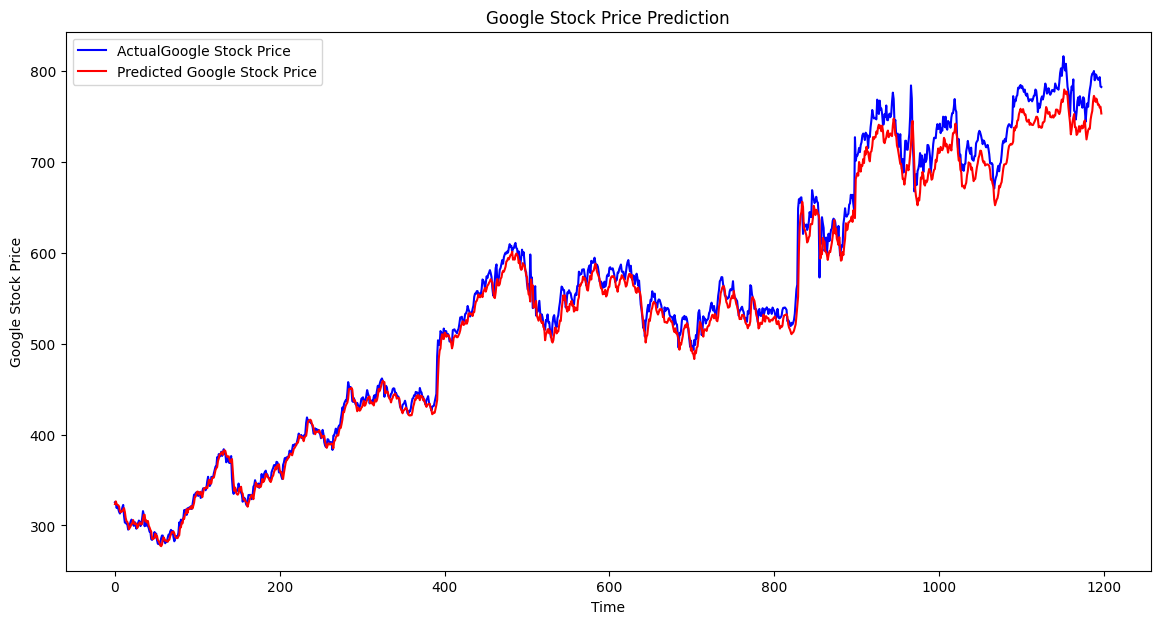

In [37]:
 # Plotting the results
 plt.figure(figsize=(14, 7))
 plt.plot(actual_stock_price, color='blue', label='Actual Google Stock Price')
 plt.plot(predicted_stock_price, color='red',
 label='Predicted Google Stock Price')
 plt.title('Google Stock Price Prediction')
 plt.xlabel('Time')
 plt.ylabel('Google Stock Price')
 plt.legend()
 plt.show()

In [38]:
 from keras.models import Sequential
 from keras.layers import Dense
 from keras.layers import LSTM

In [39]:

 regressor = Sequential()
 regressor.add(LSTM(units=4, activation= 'sigmoid', input_shape= (None,1)))
 regressor.add(Dense( units=1 ))
 regressor.compile(optimizer='adam', loss='mean_squared_error')
 regressor.fit(X, y, batch_size=32, epochs=200)

Epoch 1/200
38/38 [==============================] - 4s 13ms/step - loss: 0.1175
Epoch 2/200
38/38 [==============================] - 0s 13ms/step - loss: 0.0763
Epoch 3/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0653
Epoch 4/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0591
Epoch 5/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0536
Epoch 6/200
38/38 [==============================] - 1s 14ms/step - loss: 0.0484
Epoch 7/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0434
Epoch 8/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0383
Epoch 9/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0335
Epoch 10/200
38/38 [==============================] - 0s 13ms/step - loss: 0.0287
Epoch 11/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0241
Epoch 12/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0197
Epoch 13/200
38/38 [=====

In [40]:
actual_stock_price = scaler.inverse_transform(y.reshape(-1,1))

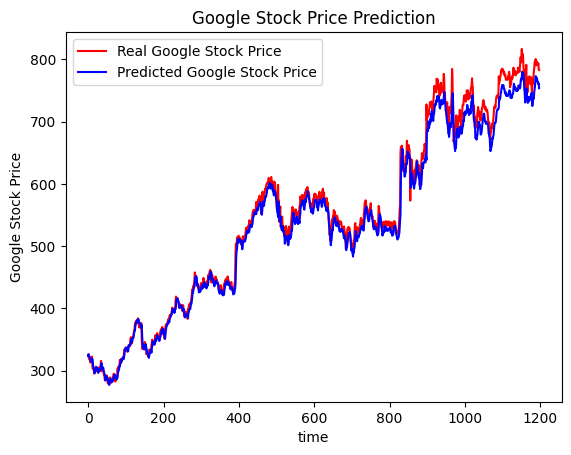

In [43]:
 plt.plot( actual_stock_price , color = 'red' , label = 'Real Google Stock Price')
 plt.plot( predicted_stock_price , color = 'blue' , label = 'Predicted Google Stock Price')
 plt.title('Google Stock Price Prediction')
 plt.xlabel( 'time' )
 plt.ylabel( 'Google Stock Price' )
 plt.legend()
 plt.show()